In [2]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
import requests
import json

from bs4 import BeautifulSoup


In [89]:
#deck to vector conversion updated for the new json dictionnary
#New: Testing

file = open("data.json", "r")

cards = json.load(file)

#removes hero classes from json
def remove_impurities(cards):
    i = 0
    j = 0
    to_del = []
    for card in cards:
        if 'cost' in card:
            i+=1
        else:
            to_del.append(card)
            print('Removed:', card['name'])
            j +=1
    for elem in to_del:
        cards.remove(elem)
    print('Number of impurities removed: ', j, '/', i+j)
    return cards

def sortby_alphabetical_cost(cards):
    sorted_list = sorted(cards, key=lambda i: (i['cost'],i['name']))
    return reset_index(sorted_list)

def reset_index(cards):
    i=0
    for card in cards:
        card['id'] = i
        i+=1
    return cards

cards = remove_impurities(cards)
cards = sortby_alphabetical_cost(cards)

deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
deck_vector_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def deck_to_vector(deck_cards):
    vect = []
    for elem in deck_cards:
        #print(elem['id'])
        vect.append(elem['id'])
        #print(elem)
        #print(elem in cards)
        #vect.append(cards[elem['id']]['id'])
    return vect
    
def vector_to_deck(deck_vector,cards=cards):
    deck = []
    for elem in deck_vector:
        deck.append(cards[elem])
    return deck


deck = vector_to_deck(deck_vector)
deck_vector = deck_to_vector(deck)

print(deck[0])
#print(deck_vector)
#res = vector_to_deck(deck_vector_2)
#print(res)
#print(deck_to_vector(res))



Removed: Anduin Wrynn
Removed: Garrosh Hellscream
Removed: Gul'dan
Removed: Illidan Stormrage
Removed: Jaina Proudmoore
Removed: Malfurion Stormrage
Removed: Rexxar
Removed: Thrall
Removed: Uther Lightbringer
Removed: Valeera Sanguinar
Number of impurities removed:  10 / 1299
{'cardId': 'EX1_277', 'dbfId': '564', 'name': 'Arcane Missiles', 'cardSet': 'Basic', 'type': 'Spell', 'faction': 'Neutral', 'rarity': 'Free', 'cost': 1, 'text': 'Deal $3 damage randomly split among all enemies.', 'flavor': "You'd think you'd be able to control your missiles a little better since you're a powerful mage and all.", 'artist': 'Warren Mahy', 'collectible': True, 'playerClass': 'Mage', 'howToGet': 'Unlocked at Level 1.', 'howToGetGold': 'Unlocked at Level 32.', 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/10b306c7bb28614307e88ecad246a59d333085bab75e2e3d92a108b6756a18d3.png', 'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b6f0e2ef6cc826bc3df7c9ff1ebe3c61db9931bda03db54a5d7274a

In [3]:
#file1 = open('cards-standard.txt', 'r') 
#Lines = file1.readlines() 
#maximum = len(Lines)
#cards_key = {}
#cards_value = {}
#i=1
#for line in Lines:
 #   cards_value[i] = line.rstrip("\n")
  #  cards_key[line.rstrip("\n")] = i
   # i += 1

#print(cards_key["Arcane Breath"])
#print(cards_value[32])
#print(len(Lines))

In [4]:
#deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
#print(len(deck_vector))

#no need to filter based of card class or legendaries etc.. because this is just for the conversion after the deck has been built. The actual filtering should be either done by the AI or previously done in the deckbuilding CSV

#def deck_to_vector_csv(deck):
 #   deck_vector = []
  #  for elem in deck:
        #remove any potential white spaces from strings
        #if type(deck) is not list:
   #     elem = elem.lstrip()
    #    elem = elem.rstrip()
     #   deck_vector.append(cards_key[elem])
    #return deck_vector

#def vector_to_deck_csv(deck_vector):
 #   deck = []
  #  for elem in deck_vector:
   #     deck.append(cards_value[elem])
    #return deck

#deck = vector_to_deck(deck_vector)
#print(deck)

#new_deck_vector = deck_to_vector(deck)
#print(new_deck_vector)


In [116]:
import numpy as np
import pandas as pd

def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result

def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        if len(deck) == 30: #len(cards)
            deck_to_convert = []
            cards = cards.strip("[]")
            cards = cards.split(", ")
            for card in cards:
                if card == '':
                    continue
                deck_to_convert.append(int(card)-1)
            converted_decks.append(vector_to_deck(deck_to_convert)) #np.asarray
            class_from_csv = df['class']
            final = concatenate_deck_class(converted_decks, class_from_csv)
    return final
            

deck_list = read_vector_decks("collected_decks_vectored_Warrior.csv")

def read_json_decks(file):
    file = open(file, "r")
    deck_list = json.load(file)
    cleaned_deck_list = []
    for deck in deck_list:
        if len(deck) == 30:
            cleaned_deck_list.append(deck)
    return cleaned_deck_list

deck_list = read_json_decks('data_Warrior.json')


deck_list[0]

[{'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  'collectible': True,
  'race': 'Demon',
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b5d2910686d797f3e762ccb4159599e227d594a9d7e5dad864fee508fb259bb9.png',
  'locale': 'enUS',
  'id': 332},
 {'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  '

In [11]:
new_deck_list = []
for deck in deck_list:
   # print(deck[0])
    new_deck = []
    for card in deck[0]:
        #print(deck[0])
        new_deck.append(cards[card['id']])
    new_deck_list.append(new_deck)
new_deck_list[0]
        

[{'cardId': 'EX1_607',
  'dbfId': '22',
  'name': 'Inner Rage',
  'cardSet': 'Classic',
  'type': 'Spell',
  'faction': 'Neutral',
  'rarity': 'Common',
  'cost': 0,
  'text': 'Deal $1 damage to a minion and give it +2_Attack.',
  'flavor': "They're only smiling on the outside.",
  'artist': 'Slawomir Maniak',
  'collectible': True,
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/4efd90fc75721bfe5a8c09b743a0bb44aa6a42dbc3b22c35f0fe89047b26deb2.png',
  'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/abb68da5ff2f70f84ecaa827ff05501beb5b472cb4de476175619552c2d5a987.png',
  'locale': 'enUS',
  'id': 8},
 {'cardId': 'EX1_607',
  'dbfId': '22',
  'name': 'Inner Rage',
  'cardSet': 'Classic',
  'type': 'Spell',
  'faction': 'Neutral',
  'rarity': 'Common',
  'cost': 0,
  'text': 'Deal $1 damage to a minion and give it +2_Attack.',
  'flavor': "They're only smiling on the outside.",
  'artist': 'Slawomir Maniak',
  'collectible': True,
  'p

In [86]:
#this became redundant after I scraped class decks separately

classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']

class_dictionary = {}

def filter_class(class_):
    filtered_decks = []
    for deck in deck_list:
        if len(deck[0]) == 30:
            if deck[1] == class_:
                filtered_decks.append(deck)
    return filtered_decks

for class_ in classes:
    class_dictionary[class_] = filter_class(class_)
    #print(filtered_decks)        

Warrior: 0
Mage: 0
Hunter: 0
Priest: 0
Druid: 0
Rogue: 0
Shaman: 0
Warlock: 0
Paladin: 0
Demon Hunter: 0


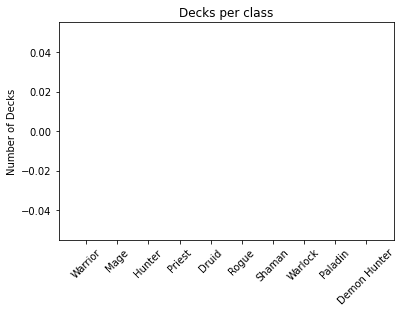

In [87]:
import numpy as np
import matplotlib.pyplot as plt

performance = []
#number of decks of each class
for class_ in classes:
    performance.append(len(class_dictionary[class_]))
    print(class_ + ": " + str(len(class_dictionary[class_])))


y_pos = np.arange(len(classes))
plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, classes, rotation = 45)
plt.ylabel('Number of Decks')
plt.title('Decks per class')
plt.show()

In [91]:
#try to get the weights from the generator and use those in random.choices()
#New: testing
import random

def sort_by_class(cl, cards):
    class_cards = []
    for card in cards:
        #check for multiclass cards
        if 'classes' in card and cl in card['classes']:
            #print(card['name'])
            for class_ in card['classes']:
                class_cards.append(card)
        else: 
            if card['playerClass'] == cl: #or card['playerClass'] == 'Neutral' if I want to add Neutrals
                class_cards.append(card)
    return class_cards

#I use 2 separate decks to increase the chances that a class card is picked otherwise there would be an imbalanced dataset
def generate_fake_deck(class_cards, neutral_cards):
    deck = []
    for i in range(30):
        x = random.randint(1,2)
        #print(x)
        if(x % 2 == 0):
            deck.append(random.choice(class_cards))
        else:
            deck.append(random.choice(neutral_cards))
    return deck_to_vector(deck)

class_cards = sort_by_class('Hunter', cards)
neutral_cards = sort_by_class('Neutral', cards)

fake_deck = generate_fake_deck(class_cards,neutral_cards) 

#print([x['name'] for x in fake_deck])
vec = [x for x in fake_deck]
print(vec)
d_vec = vector_to_deck(vec)
print([x['name'] for x in d_vec])
#print(deck_to_vector(fake_deck))

[30, 814, 566, 802, 297, 934, 1107, 456, 790, 872, 640, 742, 488, 742, 841, 645, 577, 27, 997, 219, 882, 453, 384, 659, 1017, 27, 1039, 294, 258, 1214]
['Animated Broomstick', "Mok'Nathal Lion", 'Generous Mummy', 'Krolusk Barkstripper', 'Felfire Deadeye', 'Darkscale Healer', 'Swarm of Locusts', 'Wild Pyromancer', 'Hyena Alpha', 'Troll Batrider', 'Primordial Explorer', 'Defender of Argus', 'Bloated Python', 'Defender of Argus', 'Rustsworn Cultist', 'Raid Leader', 'Hench-Clan Sneak', 'Adorable Infestation', 'Rotnest Drake', 'Acidic Swamp Ooze', 'Violet Teacher', 'Wandmaker', 'Questing Explorer', 'Scarlet Crusader', "Teacher's Pet", 'Adorable Infestation', 'Argent Commander', 'Explosive Trap', 'Costumed Entertainer', "Jewel of N'Zoth"]


In [82]:
deck_list[0]

[[{'cardId': 'EX1_607',
   'dbfId': '22',
   'name': 'Inner Rage',
   'cardSet': 'Classic',
   'type': 'Spell',
   'faction': 'Neutral',
   'rarity': 'Common',
   'cost': 0,
   'text': 'Deal $1 damage to a minion and give it +2_Attack.',
   'flavor': "They're only smiling on the outside.",
   'artist': 'Slawomir Maniak',
   'collectible': True,
   'playerClass': 'Warrior',
   'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/4efd90fc75721bfe5a8c09b743a0bb44aa6a42dbc3b22c35f0fe89047b26deb2.png',
   'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/abb68da5ff2f70f84ecaa827ff05501beb5b472cb4de476175619552c2d5a987.png',
   'locale': 'enUS',
   'id': 0},
  {'cardId': 'EX1_607',
   'dbfId': '22',
   'name': 'Inner Rage',
   'cardSet': 'Classic',
   'type': 'Spell',
   'faction': 'Neutral',
   'rarity': 'Common',
   'cost': 0,
   'text': 'Deal $1 damage to a minion and give it +2_Attack.',
   'flavor': "They're only smiling on the outside.",
   'artist': 'Slawomir Maniak',

In [117]:
import copy

#After adding sorting there have been more instances of more precise decks
#It seems that when the AI initially trains with a better initial start it the sorting results in more accurate decks than without sorting
# however I have also noticed that sometimes it has trouble training
#still inconsistant, need to find a way to make it more consistant - maybe by always testing with the same generated deck?
#when attempting to create a warrior deck it tends to have lots of mage cards

#BE CAREFUL OF PREVIOUS ID'S GETTING MIXED UP

#I need to reidentify cards id otherwise it doesn't make a difference

#BUG WHERE DECKS ARENT ID CORRECTLY

grp_classes = classes + ['Neutral']
print(grp_classes)

def groupby_cost(cards):
    sorted_list = sorted(cards, key=lambda i: i['cost'])
    return sorted_list    

def groupby_class(classes, cards):
    sorted_deck = []
    for class_ in classes:
        class_deck = sort_by_class(class_, cards)
        class_deck = groupby_cost(class_deck)
        sorted_deck.extend(class_deck)
       # print(sorted_deck)
    return sorted_deck


def limit_card_range(cards, new_deck_list, classes):
    new_cards = groupby_class(classes, cards)
   # print(new_cards[0]['id'])
    i=0
    for card in new_cards:
        card['id'] = i
        i+=1
    #new_deck_list = deck_list.copy()
    #print(new_cards[0]['id'])
    for deck in new_deck_list:
        print([x['name'] for x in deck])
        for card in deck:
            print(card['name'], card['id'])
            temp = next((new_card for new_card in new_cards if new_card['name'] == card['name']), None)
            if(temp != None):
                print(temp['name'], temp['id'])
                card['id'] = temp['id']
            #for new_card in new_cards:
                #print(card['name'])
                #print(new_card)
             #   if card['name'] == new_card['name']:
              #      card['id'] = new_card['id']
               #     break
    return new_cards, new_deck_list

new_deck_list = copy.deepcopy(deck_list)
new_cards = copy.deepcopy(cards)

new_cards, new_deck_list = limit_card_range(new_cards, new_deck_list, ['Warrior', 'Neutral'])

print('Card id: ', cards[0]['id'], new_cards[0]['id'])

#print([x['id'] for x in new_deck_list[0]])
print('Deck list: \n', [x['name'] for x in deck_list[0]],'\n', [x['name'] for x in new_deck_list[0]])
print('Deck id: \n', [x['id'] for x in deck_list[0]],'\n',[x['id'] for x in new_deck_list[0]] )
print(len(cards), len(new_cards))
print(cards[10]['name'], new_cards[10]['name'])

['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter', 'Neutral']
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Nitroboost Poison', 'Nitroboost Poison', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ancharrr', 'Frothing Berserker', 'Frothing Berserker', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Sword Eater', 'Sword Eater', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Southsea Deckhand', 'Southsea Deckhand', 'Parachute Brigand', 'Parachute Brigand', 'Dread Corsair', 'Dread Corsair', 'Captain Greenskin']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Nitroboost Poison 6
Nitroboost Poison 135
Nitroboost Poison 6
Nitroboost Poison 135
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Ancharrr 536
Ancharrr 40
Frothing Berserker 1013
Frothing Berserker 55


Hoard Pillager 335
Captain Greenskin 1080
Captain Greenskin 370
Claw Machine 140
Claw Machine 420
Claw Machine 140
Claw Machine 420
Evasive Wyrm 609
Evasive Wyrm 423
Evasive Wyrm 609
Evasive Wyrm 423
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Spiked Wheel', 'Spiked Wheel', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Minefield', 'Minefield', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', 'Barricade', 'Barricade', 'Kargath Bladefist', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Deathwing, Mad Aspect', 'Rattlegore', 'Armor Vendor', 'Armor Vendor', "C'Thun, the Shattered"]
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Spiked Wheel 12
Spiked Wheel 15
Spiked Wheel 12
Spiked Wheel 15
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951

Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Zephrys the Great 686
Zephrys the Great 229
Bone Wraith 712
Bone Wraith 307
Kobold Stickyfinger 593
Kobold Stickyfinger 388
Claw Machine 140
Claw Machine 420
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Hack the System', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Blastmaster Boom', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Hoard Pillager']
Hack the System 642
Hack the System 4
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Cor

Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Rattlegore 303
Rattlegore 104
Soulbound Ashtongue 340
Soulbound Ashtongue 143
Silas Darkmoon 152
Silas Darkmoon 461
['Athletic Studies', 'Risky Skipper', 'Sky Raider', 'Sword and Board', 'Armorsmith', 'Battle Rage', 'Bumper Car', 'Corsair Cache', 'Frightened Flunky', 'Minefield', 'Slam', 'Blad

Southsea Captain 291
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Minefield', 'Minefield', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Deathwing, Mad Aspect', 'Rattlegore', 'Kobold Stickyfinger', 'Silas Darkmoon', "C'Thun, the Shattered", 'Yogg-Saron, Master of Fate']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quarterma

Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Rattlegore 303
Rattlegore 104
Soulbound Ashtongue 340
Soulbound Ashtongue 143
Soulbound Ashtongue 340
Soulbound Ashtongue 143
Silas Darkmoon 152
Silas Darkmoon 461
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Armagedillo', 'Deathwing, Mad Aspect', 'Silas Darkmoon', 'Strongman', 'Strongman', 'Carnival Clown', 'Carnival Clown', "C'Thun, the Shattered", "N'Zoth, God of the Deep", 'Scrapyard Colossus', 'Scrapyard Colossus', 'Yogg-Saron, Master of Fate', "Y'Shaarj, the Defiler"]
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bl

Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Rattlegore 303
Rattlegore 104
Animated Broomstick 175
Animated Broomstick 111
Pen Flinger 192
Pen Flinger 136
['Hack the System', "Imprisoned Gan'arg", 'Corsair Cache', 'Minefield', "Ringmaster's Baton", 'Ancharrr', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'Livewire Lance', 'Lord Barov', 'Ramming Speed', 'Shield Block', 'Sword Eater', 'Brawl', 'Ringmaster Whatley', 'Tent Trasher', 'Deathwing, Mad Aspect', 'Licensed Adventurer', 'Parachute Brigand', 'Questing Explorer', 'Zephrys the Great', 'Circus Amalgam', 'Dread Corsair', 'Hoard Pillager', "Sky Gen'ral Kragg", 'Kobold Stickyfinger', 'Claw Machine', 'Archivist Elysiana', "N'Zoth, God of

Ringmaster's Baton 44
Ringmaster's Baton 34
Ancharrr 536
Ancharrr 40
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Ringmaster Whatley 135
Ringmaster Whatley 89
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Circus Amalgam 102
Circus Amalgam 310
Circus Amalgam 102
Circus Amalgam 310
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Stage Dive', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'E.T.C., God of Metal', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Cutting Class', 'Cutting Class', 'Rattlegore', 'Animated Broomstick', 'Anim

Minefield 38
Minefield 32
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Ringmaster Whatley 135
Ringmaster Whatley 89
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Ironbeak Owl 1019
Ironbeak Owl 268
Claw Machine 140
Claw Machine 420
C'Thun, the Shattered 165
C'Thun, the Shattered 493
['Into the Fray', 'Into the Fray', 'Stage Dive', 'Stage Dive', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'In Formation!', 'In Formation!', 'Minefield', "Ringmaster's Baton", "Ringmaster's Baton", 'Feat of Strength'

Darkmoon Dirigible 61
Darkmoon Dirigible 241
Darkmoon Dirigible 61
Darkmoon Dirigible 241
Fishy Flyer 248
Fishy Flyer 327
Fishy Flyer 248
Fishy Flyer 327
Hoard Pillager 571
Hoard Pillager 335
Hoard Pillager 571
Hoard Pillager 335
Captain Greenskin 1080
Captain Greenskin 370
Claw Machine 140
Claw Machine 420
Evasive Wyrm 609
Evasive Wyrm 423
Siamat 754
Siamat 460
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 499
['Into the Fray', 'Frightened Flunky', 'In Formation!', "Ringmaster's Baton", 'Awaken!', 'Playmaker', 'Kargath Bladefist', 'Restless Mummy', 'Scion of Ruin', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Armagedillo', 'Galakrond, the Unbreakable', 'Tomb Warden', 'Zephrys the Great', 'Infested Goblin', 'Circus Amalgam', 'Devoted Maniac', 'Fishy Flyer', 'Hoard Pillager', 'Shield of Galakrond', 'Evasive Wyrm', 'Gyrocopter', 'Kronx Dragonhoof', 'Siamat', 'Carnival Clown', 'Dragonqueen Alexstrasza', "N'Zoth, God of the Deep", 'Scrapyard Colossus']
Into the Fray 643

Onyx Magescribe 432
Archivist Elysiana 897
Archivist Elysiana 482
C'Thun, the Shattered 165
C'Thun, the Shattered 493
['Risky Skipper', 'Shield Slam', 'Sky Raider', 'Stage Dive', 'Sword and Board', 'Bumper Car', 'Corsair Cache', 'Minefield', "Ringmaster's Baton", 'Ancharrr', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Shield Block', "Reaper's Scythe", 'Restless Mummy', 'Sword Eater', 'Brawl', 'Ringmaster Whatley', 'Scrap Golem', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Zephrys the Great', 'Circus Amalgam', 'Fleethoof Pearltusk', 'Evasive Wyrm', 'Kronx Dragonhoof', 'Scavenging Shivarra', 'Dragonqueen Alexstrasza', "N'Zoth, God of the Deep"]
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Stage Dive 13
Stage Dive 16
Sword and Board 342
Sword and Board 17
Bumper Car 17
Bumper Car 22
Corsair Cache 350
Corsair Cache 25
Minefield 38
Minefield 32
Ringmaster's Baton 44
Ringmaster's Baton 34
Ancharrr 536
Ancharrr 40
Bladestorm 379

Playmaker 233
Playmaker 60
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Circus Amalgam 102
Circus Amalgam 310
Circus Amalgam 102
Circus Amalgam 310
Fishy Flyer 248
Fishy Flyer 327
Claw Machine 140
Claw Machine 420
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 499
['Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Frightened Flunky', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'Feat of Strength', 'Feat of Strength', 'Shield Block', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Tomb Warden', 'Tomb Warden', 'Strongman', 'Strongman', 'Carnival Clown', 'Carnival Clown', 'Yogg-Saron, Mast

Frothing Berserker 55
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Mortal Strike 1065
Mortal Strike 73
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Southsea Deckhand 940
Southsea Deckhand 144
Southsea Deckhand 940
Southsea Deckhand 144
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Voracious Reader 241
Voracious Reader 298
Voracious Reader 241
Voracious Reader 298
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Knife Vendor 110
Knife Vendor 336
Captain Greenskin 1080
Captain Greenskin 370
['Inner Rage', 'Shield Slam', 'Shield Slam', 'Stage Dive', 'Corsair Cache', 'Corsair Cache', 'E.T.C., God of Metal', "Ringmaster's Baton", 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Clock

Darkmoon Dirigible 241
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Hoard Pillager 571
Hoard Pillager 335
Hoard Pillager 571
Hoard Pillager 335
Big Ol' Whelp 585
Big Ol' Whelp 367
Big Ol' Whelp 585
Big Ol' Whelp 367
Captain Greenskin 1080
Captain Greenskin 370
Cobalt Spellkin 588
Cobalt Spellkin 372
Cobalt Spellkin 588
Cobalt Spellkin 372
Claw Machine 140
Claw Machine 420
Claw Machine 140
Claw Machine 420
['Athletic Studies', 'Athletic Studies', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Bumper Car', 'Bumper Car', 'Corsair Cache', 'Corsair Cache', 'E.T.C., God of Metal', 'Ancharrr', 'Playmaker', "Kor'kron Elite", "Kor'kron Elite", 'Steeldancer', 'Steeldancer', 'Sword Eater', 'Wrenchcalibur', 'Wrenchcalibur', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Ringmaster Whatley', 'Deathwing, Mad Aspect', 'Horrendous Growth', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Captain Greenskin']
Athletic Studies 176
Athletic Studies 1
Athletic

EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Armagedillo 741
Armagedillo 92
Hungry Crab 925
Hungry Crab 125
Circus Amalgam 102
Circus Amalgam 310
Circus Amalgam 102
Circus Amalgam 310
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 499
["Imprisoned Gan'arg", 'Sky Raider', 'Frightened Flunky', 'Stage Hand', 'Bomb Wrangler', 'Clockwork Goblin', 'EVIL Quartermaster', 'Livewire Lance', 'Kargath Bladefist', "Kor'kron Elite", 'Restless Mummy', 'Sword Eater', 'Arcanite Reaper', 'Ringmaster Whatley', 'Tent Trasher', 'Deathwing, Mad Aspect', 'Beaming Sidekick', 'Blazing Battlemage', 'Infectious Sporeling', 'Faerie Dragon', 'Prize Vendor', 'Zep

Y'Shaarj, the Defiler 168
Y'Shaarj, the Defiler 502
['Athletic Studies', 'Athletic Studies', 'Sky Raider', 'Sky Raider', 'Stage Dive', 'Stage Dive', 'Bumper Car', 'Bumper Car', 'E.T.C., God of Metal', "Ringmaster's Baton", "Ringmaster's Baton", 'Stage Hand', 'Stage Hand', 'Playmaker', 'Playmaker', 'Kargath Bladefist', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Tomb Warden', 'Tomb Warden', 'Faerie Dragon', 'Faerie Dragon', 'Darkmoon Statue', 'Darkmoon Statue', 'Circus Amalgam', 'Circus Amalgam', 'Hoard Pillager', 'Hoard Pillager', "N'Zoth, God of the Deep"]
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Stage Dive 13
Stage Dive 16
Stage Dive 13
Stage Dive 16
Bumper Car 17
Bumper Car 22
Bumper Car 17
Bumper Car 22
E.T.C., God of Metal 27
E.T.C., God of Metal 27
Ringmaster's Baton 44
Ringmaster's Baton 34
Ringmaster's Baton 44
Ringmaster's Baton 34
Stage Hand 51
Stage Hand 37
Stage Hand 

Ringmaster's Baton 44
Ringmaster's Baton 34
Ringmaster's Baton 44
Ringmaster's Baton 34
Stage Hand 51
Stage Hand 37
Stage Hand 51
Stage Hand 37
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Ringmaster Whatley 135
Ringmaster Whatley 89
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Parade Leader 40
Parade Leader 203
Parade Leader 40
Parade Leader 203
Wriggling Horror 55
Wriggling Horror 225
Wriggling Horror 55
Wriggling Horror 225
Derailed Coaster 122
Derailed Coaster 375
Siamat 754
Siamat 460
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 499
Scrapyard Colossus 459
Scrapyard Colossus 500
Scrapyard Colossus 459
Scrapyard Colossus 500
['Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Frightened Flunky', 'Frightened Flunky', 'In Formation!', 'In Formation!', 'Feat of Strength', 'Feat of Strength', 'Sc

Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Grommash Hellscream 1129
Grommash Hellscream 101
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Shield of Honor', 'Shield of Honor', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Lord Barov', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", "Kor'kron Elite", 'Bloodboil Brute', 'Bloodboil Brut

Onyx Magescribe 432
Onyx Magescribe 286
Onyx Magescribe 432
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Hoard Pillager', 'Captain Greenskin', 'Kronx Dragonhoof']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Whirlwind 1192
Whirlwind 19
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quart

Execute 28
Execute 1199
Execute 28
Slam 987
Slam 36
Slam 987
Slam 36
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Ceremonial Maul 220
Ceremonial Maul 48
Ceremonial Maul 220
Ceremonial Maul 48
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Archmage Vargoth 833
Archmage Vargoth 303
Colossus of the Moon 766
Colossus of the Moon 494
Living Monument 768
Living Monument 498
Living Monument 768
Living Monument 498
Scrapyard Colossus 459
Scrapyard Colossus 500
Scrapyard Colossus 459
Scrapyard Colossus 500
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Bladestorm', 'Bladestorm', 'Bu

Playmaker 60
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Steeldancer 260
Steeldancer 79
Steeldancer 260
Steeldancer 79
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Southsea Deckhand 940
Southsea Deckhand 144
Southsea Deckhand 940
Southsea Deckhand 144
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Southsea Captain 1036
Southsea Captain 291
Southsea Captain 1036
Southsea Captain 291
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Hoard Pillager 571
Hoard Pillager 335
Hoard Pillager 571
Hoard Pillager 335
Captain Greenskin 1080
Captain Greenskin 370
['Inner Rage', 'Inner Rage', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Corsair Cache', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Frothing Berserker', 'Livewire 

Southsea Deckhand 144
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Voracious Reader 241
Voracious Reader 298
Voracious Reader 241
Voracious Reader 298
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Awaken!', 'Awaken!', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Devoted Maniac', 'Devoted Maniac', 'Hoard Pillager', 'Hoard Pillager', 'Captain Greenskin', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Boar

Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Plague of Wrath 738
Plague of Wrath 88
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Hoard Pillager 571
Hoard Pillager 335
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Shield Slam', 'Shield Slam', 'Upgrade!', 'Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Awaken!', 'Awaken!', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'Lord Barov', 'Ramming Speed', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Cutting Class', 'Cutting Class', 'Blastmaster Boom', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Hoard Pillager',

EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Hoard Pillager 571
Hoard Pillager 335
['Athletic Studies', 'Shield Slam', 'Sword and Board', 'Whirlwind', 'Cleave', 'Corsair Cache', 'Execute', 'Slam', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Ramming Speed', 'Shield Block', 'Warmaul Challenger', 'Kargath Bladefist', "Reaper's Scythe", 'Restless Mummy', 'Wrenchcalibur', 'Cutting Class', 'Plague of Wrath', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Troublemaker', 'Zephrys the Great', "Headmaster Kel'Thuzad", 'Lorekeeper Polkelt', 'Kron

Awaken! 537
Awaken! 41
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Playmaker 233
Playmaker 60
Playmaker 233
Playmaker 60
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bomb Wrangler', 'Coerce', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Br

Steeldancer 79
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Southsea Deckhand 940
Southsea Deckhand 144
Southsea Deckhand 940
Southsea Deckhand 144
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Southsea Captain 1036
Southsea Captain 291
Southsea Captain 1036
Southsea Captain 291
Voracious Reader 241
Voracious Reader 298
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Captain Greenskin 1080
Captain Greenskin 370
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'Coerce', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 

Reaper's Scythe 75
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Lorekeeper Polkelt 270
Lorekeeper Polkelt 390
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bomb Wrangler', 'Bomb Wrangler', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Doctor Krastinov', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Hoard Pillager']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle 

Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Plague of Wrath 738
Plague of Wrath 88
Plague of Wrath 738
Plague of Wrath 88
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Educated Elekk 223
Educated Elekk 248
Educated Elekk 223
Educated Elekk 248
Hoard Pillager 571
Hoard Pillager 335
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Whirlwind', 'Whirlwind', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'Coerce', 'Shield Block', 'Shield Block', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional 

Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Sphere of Sapience 196
Sphere of Sapience 145
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'Archmage Vargoth', 'Scrapyard Colossus']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
B

['Inner Rage', 'Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Whirlwind', 'Execute', 'Slam', 'Bladestorm', 'Bladestorm', 'Ceremonial Maul', 'Ceremonial Maul', 'Shield Block', 'Shield Block', 'Brawl', 'Brawl', 'Bloodboil Brute', 'Bloodboil Brute', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'Archmage Vargoth', "Kael'thas Sunstrider"]
Inner Rage 907
Inner Rage 0
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Whirlwind 1192
Whirlwind 19
Execute 1199
Execute 28
Slam 987
Slam 36
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Ceremonial Maul 220
Ceremonial Maul 48
Ceremonial Maul 220
Ceremonial Maul 48
Shield Block 1239
Shield Block 62
Shield Block 

Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 386
Shield of Galakrond 598
Shield of Galakrond 400
Keymaster Alabaster 293
Keymaster Alabaster 457
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Slam', 'Bloodsworn Mercenary', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Bloodboil Brute', 'Blood

Reaper's Scythe 256
Reaper's Scythe 75
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
['Into the Fray', 'Into the Fray', 'Risky Skipper', 'Risky Skipper', 'Upgrade!', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'Ancharrr', 'Lord Barov', "Reaper's Scythe", "Reaper's Scythe", 'Steeldancer', 'Steeldancer', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Armored Goon', 'Gorehowl', 'Dread Corsair', 'Dread Corsair']
Into the Fray 643
Into the Fray 7
Into the Fray 643
Into the Fray 7
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair C

Slam 36
Slam 987
Slam 36
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Scrapyard Colossus 459
Scrapyard Colossus 500
Scrapyard Colossus 459
Scrapyard Colossus 500
['Athletic Studies', 'Athletic Studies', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Corsair Cache'

EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Hoard Pillager 571
Hoard Pillager 335
Hoard Pillager 571
Hoard Pillager 335
Captain Greenskin 1080
Captain Greenskin 370
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Boom Squad', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Execute', 'Execute', 'Bladestorm', 'Ramming Speed', 'Shield Block', 'Shield Block', "Reaper's Scythe", 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattle

Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
In Formation! 208
In Formation! 31
In Formation! 208
In Formation! 31
Coerce 221
Coerce 51
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Grommash Hellscream 1129
Grommash Hellscream 101
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Hoard Pillager 571
Hoard Pillager 335
Batterhead 887
Batterhead 470
['Athletic Studies', 'Improve Morale', 'Improve Morale', 'S

Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Hoard Pillager 571
Hoard Pillager 335
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 350
['Hack the System', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Li

Infested Goblin 266
Ironfur Grizzly 1230
Ironfur Grizzly 270
Ironfur Grizzly 1230
Ironfur Grizzly 270
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Khartut Defender 745
Khartut Defender 428
Khartut Defender 745
Khartut Defender 428
Kronx Dragonhoof 612
Kronx Dragonhoof 429
Scrapyard Colossus 459
Scrapyard Colossus 500
Scrapyard Colossus 459
Scrapyard Colossus 500
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", 'Bloodboil Brute', 'Bloodboil Brute',

Bloodsworn Mercenary 43
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Molten Breath 573
Molten Breath 72
Molten Breath 573
Molten Breath 72
Brawl 1079
Brawl 83
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Cobalt Spellkin 588
Cobalt Spellkin 372
Archivist Elysiana 897
Archivist Elysiana 482
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", 'Bloodboil Brute', '

Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Mortal Strike 1065
Mortal Strike 73
Blazing Battlemage 498
Blazing Battlemage 115
Blazing Battlemage 498
Blazing Battlemage 115
Southsea Deckhand 940
Southsea Deckhand 144
Southsea Deckhand 940
Southsea Deckhand 144
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Southsea Captain 1036
Southsea Captain 291
Southsea Captain 1036
Southsea Captain 291
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Captain Greenskin 1080
Captain Greenskin 370
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn M

Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
['Boom Squad', 'Boom Squad', 'Whirlwind', 'Whirlwind', 'Slam', 'Slam', 'Sweeping Strikes', 'Bladestorm', 'Bladestorm', 'Ramming Speed', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Brawl', 'Brawl', 'Plague of Wrath', 'P

['Upgrade!', 'Upgrade!', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'Bulwark of Azzinoth', 'Shield Block', 'Shield Block', 'Brawl', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Tomb Warden', 'Tomb Warden', 'Youthful Brewmaster', 'Youthful Brewmaster', 'Spellward Jeweler', 'Spellward Jeweler', 'Archmage Vargoth', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Hoard Pillager', 'Captain Greenskin', 'Cobalt Spellkin', 'Cobalt Spellkin']
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90

Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Cruel Taskmaster 958
Cruel Taskmaster 26
Execute 1199
Execute 28
Slam 987
Slam 36
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Wrenchcalibur 853
Wrenchcalibur 81
Arcanite Reaper 1269
Arcanite Reaper 82
Brawl 1079
Brawl 83
Armored Goon 742
Armored Goon 93
Blastmaster Boom 879
Blastmaster Boom 94
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Zephrys the Great 686
Zephrys the Great 229
Dragonqueen Alexs

Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Merce

Grommash Hellscream 101
Serpent Egg 679
Serpent Egg 211
Serpent Egg 679
Serpent Egg 211
['Hack the System', 'Shield Slam', 'Shield Slam', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Armored Goon', 'Armored Goon', 'Blastmaster Boom', 'Deathwing, Mad Aspect', 'Licensed Adventurer', 'Licensed Adventurer', 'Questing Explorer', 'Questing Explorer', 'Hoard Pillager', 'Magtheridon', "Sky Gen'ral Kragg", 'Khartut Defender', 'Khartut Defender']
Hack the System 642
Hack the System 4
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Liv

Armorsmith 20
Battle Rage 951
Battle Rage 21
Execute 1199
Execute 28
Frightened Flunky 666
Frightened Flunky 29
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bonechewer Raider 383
Bonechewer Raider 45
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Omega Devastator 843
Omega Devastator 74
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Zephrys the Great 686
Zephrys the Great 229
Grand Lackey Erkh 482
Grand Lackey Erkh 331
Harrison Jones 1088
Harrison Jones 385
Siamat 754
Siamat 460
Archivist Elysiana 897
Archivist Elysiana 482
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Inner Rage', 'Inner Rage', 'Risky S

EVIL Quartermaster 52
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Armored Goon 742
Armored Goon 93
Armored Goon 742
Armored Goon 93
Blastmaster Boom 879
Blastmaster Boom 94
Grommash Hellscream 1129
Grommash Hellscream 101
Vulpera Scoundrel 707
Vulpera Scoundrel 299
Vulpera Scoundrel 707
Vulpera Scoundrel 299
Hoard Pillager 571
Hoard Pillager 335
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Sweeping Strikes', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Brawl', 'Brawl', 'Plague of Wrath', 'Deathwing, Mad Aspect', 'Dimensional Ripper', 'Dimensional Ripper', 'Archmage Vargoth', 'Blatant Decoy', 'Bonechewer Vanguard', 'Bonechewer Vanguard', 'Evasive Drakonid', 'Evasive Drakonid

Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Omega Devastator 843
Omega Devastator 74
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Plague of Wrath 738
Plague of Wrath 88
Armored Goon 742
Armored Goon 93
Blastmaster Boom 879
Blastmaster Boom 94
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Quicksand Elemental 676
Quicksand Elemental 207
Quicksand Elemental 676
Quicksand Elemental 207
Platebreaker 596
Platebreaker 397
Tentacled Menace 601
Tentacled Menace 409
Bonechewer Vanguard 442
Bonechewer Vanguard 450
Eva

Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Injured Tol'vir 669
Injured Tol'vir 183
Injured Tol'vir 669
Injured Tol'vir 183
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Whirlwind', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Rampage', 'Rampage', 'Ritual Chopper', 'Ritual Chopper', 'Vicious Scraphound', 'Vicious Scraphound', 'A

Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Imprisoned Vilefiend 360
Imprisoned Vilefiend 182
Imprisoned Vilefiend 360
Imprisoned Vilefiend 182
Injured Tol'vir 669
Injured Tol'vir 183
Injured Tol'vir 669
Injured Tol'vir 183
Serpent Egg 679
Serpent Egg 211
Serpent Egg 679
Serpent Egg 211
Teron Gorefiend 396
Teron Gorefiend 294
['Sky Raider', 'Sky Raider', 'Corsair Cache', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Clockwork Goblin', 'Clockwork Goblin', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Wrenchcalibur', 'Wrenc

Brawl 83
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 303
Bonechewer Vanguard 442
Bonechewer Vanguard 450
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'Heroic Strike', 'Heroic Strike', 'Ancharrr', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Parachute Brigand', 'Parachute Brigand', 'Frozen Shadoweaver', 'Frozen Shadoweaver', 'Dread Corsair', 'Dread Corsair', 'Frenzied Felwing', 'Frenzied Felwing', 'Hoard Pillager', 'Maiev Shadowsong', 'Captain Greenskin']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'ar

Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bonechewer Raider 45
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Gorehowl 1122
Gorehowl 99
Injured Tol'vir 669
Injured Tol'vir 183
Injured Tol'vir 669
Injured Tol'vir 183
Temple Berserker 683
Temple Berserker 219
Temple Berserker 683
Temple Berserker 219
Ruststeed Raider 428
Ruststeed Raider 399
['Hack the System', 'Shield Slam', 'Shield Slam', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Cors

Inner Rage 0
Hack the System 642
Hack the System 4
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancharrr 536
Ancharrr 40
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Licensed Adventurer 467
Licensed Adventurer 187
Licensed Adventurer 467
Licensed

Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Blastmaster Boom 879
Blastmaster Boom 94
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Bonechewer Brawler 349
Bonechewer Brawler 161
Bonechewer Brawler 349
Bonechewer Brawler 161
Infested Goblin 700
Infested Goblin 266
Infested Goblin 700
Infested Goblin 266
Overconfident Orc 394
Overconfident Orc 280
Overconfident Orc 394
Overconfident Orc 280
Bone Wraith 712
Bone Wraith 307
Bone Wraith 712
Bone Wraith 307
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Captain Greenskin 1080
Captain Greenskin 370
Ruststeed Raider 428
Ruststeed Raider 399
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Battle Rage', 'Battle Rage', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', 'Molten Breath', 'Molten Breath', 

Bomb Wrangler 44
Bonechewer Raider 383
Bonechewer Raider 45
Livewire Lance 701
Livewire Lance 57
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Zephrys the Great 686
Zephrys the Great 229
Infested Goblin 700
Infested Goblin 266
Overconfident Orc 394
Overconfident Orc 280
Hippogryph 570
Hippogryph 334
Ruststeed Raider 428
Ruststeed Raider 399
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Shield Block'

Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Zephrys the Great 686
Zephrys the Great 229
Vulpera Scoundrel 707
Vulpera Scoundrel 299
Maiev Shadowsong 410
Maiev Shadowsong 338
Cobalt Spellkin 588
Cobalt Spellkin 372
Evasive Wyrm 609
Evasive Wyrm 423
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Risky Skipper', 'Shield Slam', 'Whirlwind', 'Armorsmith', 'Battle Rage', 'Execute', 'Bladestorm', 'Bomb Wrangler', 'EVIL Quartermaster', 'Livewire Lance', 'Ramming Speed', 'Shield Block', 'Warmaul Challenger', 'Kargath Bladefist', 'Molten Breath', 'Restless Mummy', 'Brawl', 'Plague of Wrath', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Zephrys the Great', 'Bone Wraith', 'Magtheridon', 'Maiev Shadowsong', "Big Ol' Whelp", 'Cobalt Spellkin', 'Faceless Corruptor', 'Harrison Jones', 'Siamat', 'Dragonqueen Alexstrasza']
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Battle Rag

Maiev Shadowsong 338
['Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bonechewer Raider', 'Bonechewer Raider', 'Frothing Berserker', 'Frothing Berserker', 'Kargath Bladefist', 'Scion of Ruin', 'Scion of Ruin', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Guardian Augmerchant', 'Guardian Augmerchant', 'Dragon Breeder', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Evasive Wyrm', 'Evasive Wyrm', 'Kronx Dragonhoof']
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bonechewer Raider 383
Bonechewer Raider 45
Bonechewer Raider 383
Bo

Bloodboil Brute 95
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Guardian Augmerchant 330
Guardian Augmerchant 122
Temple Berserker 683
Temple Berserker 219
Temple Berserker 683
Temple Berserker 219
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Maiev Shadowsong 410
Maiev Shadowsong 338
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Inner Rage', 'Inner Rage', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Kargath Bladefist', "Kor'kron Elite", "Kor'kron Elite", 'Scion of Ruin', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Ga

Sword and Board 342
Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Execute 1199
Execute 28
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Questing Explorer 675
Questing Explorer 206
Questing Explorer 675
Questing Explorer 206
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 350
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
[

Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Hoard Pillager 571
Hoard Pillager 335
Captain Greenskin 1080
Captain Greenskin 370
Faceless Corruptor 592
Faceless Corruptor 377
Faceless Corruptor 592
Faceless Corruptor 377
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', "Kor'kron Elite", "Kor'kron Elite", 'Scion of Ruin', 'Scion of Ruin', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Guardian Augmerchant', 'Guardian Augmerchant', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle

Frothing Berserker 55
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Grommash Hellscream 1129
Grommash Hellscream 101
Guardian Augmerchant 330
Guardian Augmerchant 122
Guardian Augmerchant 330
Guardian Augmerchant 122
Devoted Maniac 562
Devoted Maniac 317
Devoted Maniac 562
Devoted Maniac 317
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ancharrr', 'Livewire Lance', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Blazing Battlemage', 'Blazing Battlemage', 'Southsea Deck

Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Omega Devastator 843
Omega Devastator 74
Restless Mummy 720
Restless Mummy 76
Scion of Ruin 575
Scion of Ruin 77
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Zephrys the Great 686
Zephrys the Great 229
Overconfident Orc 394
Overconfident Orc 280
Devoted Maniac 562
Devoted Maniac 317
Maiev Shadowsong 410
Maiev Shadowsong 338
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
Siamat 754
Siamat 460
Archivist Elysiana 897
Archivist Elysiana 482
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Boom Squad', 'Into the Fray'

Bloodsail Raider 954
Bloodsail Raider 159
Parachute Brigand 528
Parachute Brigand 202
Parachute Brigand 528
Parachute Brigand 202
Southsea Captain 1036
Southsea Captain 291
Southsea Captain 1036
Southsea Captain 291
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Hoard Pillager 571
Hoard Pillager 335
Hoard Pillager 571
Hoard Pillager 335
Faceless Corruptor 592
Faceless Corruptor 377
Faceless Corruptor 592
Faceless Corruptor 377
Shield of Galakrond 598
Shield of Galakrond 400
Shield of Galakrond 598
Shield of Galakrond 400
Kronx Dragonhoof 612
Kronx Dragonhoof 429
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ritual Chopper', 'Ritual Chopper', 'Ancharrr', 'Skybarge', 'Skybarge', 'Galakrond, the Unbreakable', 'Blazing Battlemage', 'Blazing Battlemage', 'Bloodsail Raider', 'Bloodsail Raider', 'Parachute Brigand', 'Parachute Brigand', 'Southsea Captain', 'Southsea Captain', 'Devoted Maniac', 'Devoted Maniac', 'Dragonmaw Poacher', 'Dragonmaw Poacher', 'Drea

Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Gurubashi Berserker 1278
Gurubashi Berserker 383
Gurubashi Berserker 1278
Gurubashi Berserker 383
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Lord of the Arena 1287
Lord of the Arena 430
Lord of the Arena 1287
Lord of the Arena 430
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', 'Wolfrider', 'Wolfrider', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Booty Bay Bodyguard', 'Booty Bay Bodyguard', 'Darkscale Healer', 'Darkscale Healer', 'Stormpike Commando', 'Stormpike Commando', 'Boulderfist Ogre', 'Lord of the Arena', 'Lord of the Arena', 'Reckless Rocketeer', 'Reckless Rocketeer', 'War Golem']
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery W

Fiery War Axe 54
Shield Block 1239
Shield Block 62
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Stonetusk Boar 1187
Stonetusk Boar 146
Stonetusk Boar 1187
Stonetusk Boar 146
Voodoo Doctor 1191
Voodoo Doctor 149
Voodoo Doctor 1191
Voodoo Doctor 149
Bluegill Warrior 1196
Bluegill Warrior 160
Bluegill Warrior 1196
Bluegill Warrior 160
Murloc Tidehunter 1208
Murloc Tidehunter 198
Murloc Tidehunter 1208
Murloc Tidehunter 198
Ironfur Grizzly 1230
Ironfur Grizzly 270
Ironfur Grizzly 1230
Ironfur Grizzly 270
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Stormwind Knight 1264
Stormwind Knight 352
Stormwind Knight 1264
Stormwind Knight 352
Gurubashi Berserker 1278
Gurubashi Berserker 383
Gurubashi Berserker 1278
Gurubashi Berserker 383
Reckless Ro

Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Murloc Raider 1181
Murloc Raider 132
Murloc Raider 1181
Murloc Raider 132
Frostwolf Grunt 1202
Frostwolf Grunt 177
Frostwolf Grunt 1202
Frostwolf Grunt 177
Murloc Tidehunter 1208
Murloc Tidehunter 198
Murloc Tidehunter 1208
Murloc Tidehunter 198
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Dragonling Mechanic 1248
Dragonling Mechanic 320
Dragonling Mechanic 1248
Dragonling Mechanic 320
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Gurubashi Berserker 1278
Gurubashi Berserker 383
Gurubashi Berserker 1278
Gurubashi Berserker 383
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Lord of the Arena 1287
Lord of the Arena 430
Lord of the Arena 1287
Lord of the Arena 430
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fie

Stonetusk Boar 146
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Bluegill Warrior 1196
Bluegill Warrior 160
Ironfur Grizzly 1230
Ironfur Grizzly 270
Ironfur Grizzly 1230
Ironfur Grizzly 270
Raid Leader 1233
Raid Leader 283
Raid Leader 1233
Raid Leader 283
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Nightblade 1279
Nightblade 393
Nightblade 1279
Nightblade 393
Reckless Rocketeer 1288
Reckless Rocketeer 435
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Stonetusk Boar', 'Stonetusk Boar', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior', 'Ironfur Grizzly', 'Ironfur Grizzly', 

Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Chillwind Yeti 1246
Chillwind Yeti 309
Chillwind Yeti 1246
Chillwind Yeti 309
Gnomish Inventor 1250
Gnomish Inventor 330
Gnomish Inventor 1250
Gnomish Inventor 330
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Stormwind Champion 1294
Stormwind Champion 462
['Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Ironfur Grizzly', 'Ironfur Grizzly', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Chillwind Yeti', 'Chillwind Yeti', 'Gnomish Inventor', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Boulderfist Ogre', 'Boulderfist Ogre']
Whirlwind 119

Chillwind Yeti 309
Gnomish Inventor 1250
Gnomish Inventor 330
Gnomish Inventor 1250
Gnomish Inventor 330
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Stormpike Commando 1281
Stormpike Commando 406
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Stormwind Champion 1294
Stormwind Champion 462
['Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bloodfen Raptor', 'Bloodfen Raptor', 'Novice Engineer', 'Novice Engineer', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Chillwind Yeti', 'Chillwind Yeti', 'Gnomish Inventor', 'Gnomish Inventor', 'Boulderfist Ogre', 'Boulderfist Ogre']
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Execute 

River Crocolisk 208
River Crocolisk 1210
River Crocolisk 208
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Chillwind Yeti 1246
Chillwind Yeti 309
Chillwind Yeti 1246
Chillwind Yeti 309
Gnomish Inventor 1250
Gnomish Inventor 330
Gnomish Inventor 1250
Gnomish Inventor 330
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Darkscale Healer 1275
Darkscale Healer 374
Frostwolf Warlord 1276
Frostwolf Warlord 382
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Stormwind Champion 1294
Stormwind Champion 462
Stormwind Champion 1294
Stormwind Champion 462
['Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Acidic Swam

Harvest Golem 1014
Harvest Golem 260
Harvest Golem 1014
Harvest Golem 260
Dark Iron Dwarf 1053
Dark Iron Dwarf 315
Dark Iron Dwarf 1053
Dark Iron Dwarf 315
Nightblade 1279
Nightblade 393
Nightblade 1279
Nightblade 393
Argent Commander 1098
Argent Commander 415
Argent Commander 1098
Argent Commander 415
['Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Razorfen Hunter', 'Razorfen Hunter', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Chillwind Yeti', 'Chillwind Yeti', 'Gnomish Inventor', 'Gnomish Inventor', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Boulderfist Ogre', 'Boulderfist Ogre']
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203


Cruel Taskmaster 958
Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Slam 987
Slam 36
Slam 987
Slam 36
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Amani Berserker 946
Amani Berserker 154
Amani Berserker 946
Amani Berserker 154
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Raging Worgen 1031
Raging Worgen 282
Raging Worgen 1031
Raging Worgen 282
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Dread Corsair 1055
Dread Corsair 322
['Upgrade!', 'Cruel Taskmaster', 'Cruel Taskmaster', 

Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Execute 1199
Execute 28
Execute 1199
Execute 28
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Slam 987
Slam 36
Slam 987
Slam 36
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Dire Wolf Alpha 961
Dire Wolf Alpha 168
Dire Wolf Alpha 961
Dire Wolf Alpha 168
Sunfury Protector 992
Sunfury Protector 216
Sunfury Protector 992
Sunfury Protector 216
Defender of Argus 1054
Defender of Argus 316
Defender of Argus 1054
Defender of Argus 316
['Inner Rage', 'Inner Rage', 'Upgrade!', 'Upgrade!', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Grommash Hellscream', 'Abusive Sergeant', 'Abusive Sergeant', 'Leper Gnome', 'Leper Gnome', 'Southsea Deckhand', 'Southsea Deckhand', 'Bluegill War

Earthen Ring Farseer 1007
Earthen Ring Farseer 247
Spiteful Smith 1092
Spiteful Smith 403
Argent Commander 1098
Argent Commander 415
Reckless Rocketeer 1288
Reckless Rocketeer 435
['Inner Rage', 'Inner Rage', 'Charge', 'Charge', 'Upgrade!', 'Whirlwind', 'Whirlwind', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Heroic Strike', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Brawl', 'Grommash Hellscream', 'Abusive Sergeant', 'Abusive Sergeant', 'Southsea Deckhand', 'Bluegill Warrior', 'Bluegill Warrior', 'Knife Juggler', 'Kobold Geomancer', 'Ironbeak Owl', 'Ironbeak Owl', 'Argent Commander', 'Argent Commander']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Charge 1166
Charge 3
Charge 1166
Charge 3
Upgrade! 942
Upgrade! 18
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Cruel Taskmaster 958
Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Heroic Strike 1203
Heroic Strike 30
Slam 987
Slam 36
Slam 987
Slam 36
F

Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Leper Gnome 927
Leper Gnome 129
Leper Gnome 927
Leper Gnome 129
Amani Berserker 946
Amani Berserker 154
Amani Berserker 946
Amani Berserker 154
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Faerie Dragon 965
Faerie Dragon 174
Faerie Dragon 965
Faerie Dragon 174
Youthful Brewmaster 996
Youthful Brewmaster 227
Youthful Brewmaster 996
Youthful Brewmaster 227
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
['Inner Rage', 'Inner Rage', 'Whirlwind', 'Whirlwind', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Commanding Shout', 'Commanding Shout', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Frothing Berserker', 'Frothing Berserker', 'Shield Block', 'Shield Block', 'Arcanite Reaper', 'Brawl', 'Gorehowl', 'Grommash Hellscream', 'Amani Berserker', 'Amani Berserker', 'Raging Worgen', 'Ra

Nightblade 393
Nightblade 1279
Nightblade 393
Argent Commander 1098
Argent Commander 415
Argent Commander 1098
Argent Commander 415
['Charge', 'Charge', 'Cleave', 'Cleave', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Argent Squire', 'Stonetusk Boar', 'Voodoo Doctor', 'Voodoo Doctor', 'Dire Wolf Alpha', 'Frostwolf Grunt', 'Frostwolf Grunt', 'River Crocolisk', 'Ironbeak Owl', 'Ironfur Grizzly', 'Ironfur Grizzly', 'Wolfrider', 'Chillwind Yeti', 'Dragonling Mechanic', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'War Golem']
Charge 1166
Charge 3
Charge 1166
Charge 3
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Re

Cruel Taskmaster 26
Execute 1199
Execute 28
Slam 987
Slam 36
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Grommash Hellscream 1129
Grommash Hellscream 101
Amani Berserker 946
Amani Berserker 154
Amani Berserker 946
Amani Berserker 154
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Harvest Golem 1014
Harvest Golem 260
Harvest Golem 1014
Harvest Golem 260
Raging Worgen 1031
Raging Worgen 282
Raging Worgen 1031
Raging Worgen 282
['Upgrade!', 'Upgrade!', 'Cruel Taskmaster

Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Arcanite Reaper 1269
Arcanite Reaper 82
Gorehowl 1122
Gorehowl 99
Elven Archer 1170
Elven Archer 118
Southsea Deckhand 940
Southsea Deckhand 144
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Bloodsail Raider 954
Bloodsail Raider 159
Bloodsail Raider 954
Bloodsail Raider 159
Knife Juggler 969
Knife Juggler 184
Master Swordsmith 978
Master Swordsmith 195
Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Big Game Hunter 1077
Big Game Hunter 366
Captain Greenskin 1080
Captain Greenskin 370
Nightblade 1279
Nightblade 393
Nightblade 1279
Nightblade 393
Spiteful Smith 1092
Spiteful Smith 403
Stormpike Commando 1281
Stormpike Commando 406
Ravenholdt Assassin 1124
Ravenholdt Assassin 458
['Upgrade!', 'Upgrade!', 'Whirlwind', 'Whirlwind', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execut

Stranglethorn Tiger 1095
Stranglethorn Tiger 407
Stranglethorn Tiger 1095
Stranglethorn Tiger 407
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
['Inner Rage', 'Inner Rage', 'Charge', 'Charge', 'Shield Slam', 'Whirlwind', 'Whirlwind', 'Armorsmith', 'Armorsmith', 'Cleave', 'Cruel Taskmaster', 'Cruel Taskmaster', 'Execute', 'Execute', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', 'Arcanite Reaper', 'Arcanite Reaper', 'Brawl', 'Gorehowl', 'Raging Worgen', 'Raging Worgen', 'Big Game Hunter', 'Faceless Manipulator']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Charge 1166
Charge 3
Charge 1166
Charge 3
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Cleave 1198
Cleave 23
Cruel Taskmaster 958
Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Execute 1199
Execut

Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Amani Berserker 946
Amani Berserker 154
Amani Berserker 946
Amani Berserker 154
Bloodsail Raider 954
Bloodsail Raider 159
Knife Juggler 969
Knife Juggler 184
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Dark Iron Dwarf 1053
Dark Iron Dwarf 315
Argent Commander 1098
Argent Commander 415
Boulderfist Ogre 1284
Boulderfist Ogre 417
['Upgrade!', 'Upgrade!', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Argent Squire', 'Argent Squire', 'Leper Gnome', 'Leper Gnome', 'Bloodsail Raider', 'Bloodsail R

Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Nightblade 1279
Nightblade 393
Nightblade 1279
Nightblade 393
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284
Boulderfist Ogre 417
Lord of the Arena 1287
Lord of the Arena 430
Lord of the Arena 1287
Lord of the Arena 430
['Athletic Studies', 'Athletic Studies', 'Frightened Flunky', 'Frightened Flunky', 'Minefield', 'Minefield', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Armagedillo', 'Deathwing, Mad Aspect', 'Circus Amalgam', 'Circus Amalgam', 'Strongman', 'Strongman', 'Carnival Clown', 'Carnival Clown', "N'Zoth, God of the Deep", 'Yogg-Saron, Master of Fate', "Y'Shaarj, the Defiler"]
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Frightened Flunky 666
Frightened Flunky 29
Frightened Fl

Dread Corsair 1055
Dread Corsair 322
Dread Corsair 1055
Dread Corsair 322
Captain Greenskin 1080
Captain Greenskin 370
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Heroic Strike', 'Ancharrr', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Parachute Brigand', 'Parachute Brigand', 'Ironbeak Owl', 'Southsea Captain', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Hoard Pillager']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Ancharrr 536
Ancharrr 40
Livewire Lance 70

Escaped Manasaber 323
Grand Lackey Erkh 482
Grand Lackey Erkh 331
Maiev Shadowsong 410
Maiev Shadowsong 338
Boompistol Bully 485
Boompistol Bully 368
Cobalt Spellkin 588
Cobalt Spellkin 372
Ruststeed Raider 428
Ruststeed Raider 399
Siamat 754
Siamat 460
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 485
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Upgrade!', 'Upgrade!', 'Whirlwind', 'Corsair Cache', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Brawl', 'Plague of Wrath', 'Scrap Golem', 'Scrap Golem', 'Deathwing, Mad Aspect', 'Hoard Pillager', 'Hoard Pillager', 'Magtheridon', 'Maiev Shadowsong', 'Alexstrasza', 'Archivist Elysiana']
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade

Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Bluegill Warrior 1196
Bluegill Warrior 160
Bluegill Warrior 1196
Bluegill Warrior 160
Raid Leader 1233
Raid Leader 283
Raid Leader 1233
Raid Leader 283
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Stormwind Knight 1264
Stormwind Knight 352
Stormwind Knight 1264
Stormwind Knight 352
Nightblade 1279
Nightblade 393
Nightblade 1279
Nightblade 393
Reckless Rocketeer 1288
Reckless Rocketeer 435
Reckless Rocketeer 1288
Reckless Rock

Bloodfen Raptor 1195
Bloodfen Raptor 157
Bloodfen Raptor 1195
Bloodfen Raptor 157
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Chillwind Yeti 1246
Chillwind Yeti 309
Chillwind Yeti 1246
Chillwind Yeti 309
Gnomish Inventor 1250
Gnomish Inventor 330
Gnomish Inventor 1250
Gnomish Inventor 330
Darkscale Healer 1275
Darkscale Healer 374
Darkscale Healer 1275
Darkscale Healer 374
Stormwind Champion 1294
Stormwind Champion 462
Stormwind Champion 1294
Stormwind Champion 462
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Booty Bay Bodyguard', 'Booty Bay Bodyguard', 'Darkscale Healer', 'Darkscale Healer', 'Stormpike Comman

Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 153
Bloodfen Raptor 1195
Bloodfen Raptor 157
Bloodfen Raptor 1195
Bloodfen Raptor 157
Bluegill Warrior 1196
Bluegill Warrior 160
Bluegill Warrior 1196
Bluegill Warrior 160
Murloc Tidehunter 1208
Murloc Tidehunter 198
Murloc Tidehunter 1208
Murloc Tidehunter 198
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Shattered Sun Cleric 1238
Shattered Sun Cleric 288
Gnomish I

Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Murloc Raider 1181
Murloc Raider 132
Murloc Raider 1181
Murloc Raider 132
Frostwolf Grunt 1202
Frostwolf Grunt 177
Frostwolf Grunt 1202
Frostwolf Grunt 177
Murloc Tidehunter 1208
Murloc Tidehunter 198
Murloc Tidehunter 1208
Murloc Tidehunter 198
Razorfen Hunter 1234
Razorfen Hunter 284
Razorfen Hunter 1234
Razorfen Hunter 284
Wolfrider 1244
Wolfrider 300
Wolfrider 1244
Wolfrider 300
Dragonling Mechanic 1248
Dragonling Mechanic 320
Dragonling Mechanic 1248
Dragonling Mechanic 320
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 348
Gurubashi Berserker 1278
Gurubashi Berserker 383
Gurubashi Berserker 1278
Gurubashi Berserker 383
Boulderfist Ogre 1284
Boulderfist Ogre 417
Boulderfist Ogre 1284

In [118]:
print(deck_list[0][0]['id'])
print(new_deck_list[0][0]['id'])

332
5


In [36]:

# define the standalone discriminator model
def define_discriminator(n_inputs=30):
    model = Sequential()
    model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=30):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    #model.add(Round())
    model.add(Dense(n_outputs, activation='linear')) #relu #linear
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.compile(loss='mean_absolute_error', optimizer='Adam')

    return model



In [37]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [38]:
#generate a fake deck function
#function that collects a sample of decks from dataset
#function that filters the dataset based on the class selected
#function that converts decks into vectors and back into decks
#function that links generated GAN deck into simulator

#Equivalent generate latent points function for decks?
#how would I generate "fake" decks from the generator? 
# - The generator usually takes a noise vector from the latent dimension. How would I do that in my problem? Do I need to create a sort of histogram function that "encapsulates" a deck and all the cards from every data row are added to it, then the chosen deck highlights the points on the chart
#how would I convert the decks into vectors to feed into the Network? 
# - Maybe by creating a collection of cards and associate a key to their name and use those keys to create a vector of shape[30]
#Feeding vectors of decks should work right? 
#which of the examples should I base myself off? Are they both correct?


#Generate a random vector of 30 random cards. 
#Input of the neural network would be 30

def generate_deck_samples(n, class_):
    samples = []
    #labels = []
    size = len(class_dictionary[class_])
    for i in range(n):
        if i > size:
            n = size
            break
        else:
            index = random.randint(0,size-1)
            #print(index)
            #print(class_dictionary[class_][index][0])
            samples.append(np.asarray(deck_to_vector(class_dictionary[class_][index][0]))) #!!!!
            
    labels = ones((len(samples), 1))        
    return np.asarray(samples), labels

real_X, real_Y = generate_deck_samples(5, 'Warrior')
print(real_X.shape)
print(real_Y.shape)


latent_space = []
for x in real_X:
    for y in x:
        latent_space.append(y)
print(real_X)

print(type(real_X))
print(type(real_Y))

def generate_random_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck
        
def generate_fake_decks(generator, n, class_cards, neutral_cards):
    fake_decks = []
    for i in range(n):
        fake_decks.append(generate_fake_deck(class_cards, neutral_cards))
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = zeros((n,1))
    return X, y

def generate_fake_sample(generator,class_cards, neutral_cards):
    fake_decks = []
    fake_decks.append(generate_fake_deck(class_cards, neutral_cards))
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = ones((1,1))
    return X, y


(5, 30)
(5, 1)
[[   8   52   52  282  282  304  304  539  539  548  548  693  693  777
   777  792  792  873  873 1170   34  110  234  234  625  625  951  951
  1006 1013]
 [ 243  282  282  539  539  651  777  777  873  873   76  212  212  232
   232  380  629  629  650  650  710  710  749  749  822  822  980 1013
  1013 1141]
 [  92  152  169  198  229  379  459  468  476  480  590  654  777  820
  1116  173  234  360  372  428  452  721  730  763  828  891  939  971
  1047 1212]
 [  47  163  163  183  183  282  282  471  628  651  651  810  813  813
   890  890  968  968 1007 1100 1100 1162 1197 1197 1225 1235 1235 1251
  1247 1247]
 [  99   99  169  169  249  249  304  304  459  590  590  654  654  777
   777  792  792  173  173  234  234  360  360  657  657  730  730  763
   763  891]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
# evaluate the discriminator and plot real and fake points
def summarize_performance_gan(epoch, generator, discriminator, class_, class_cards, neutral_cards, n=1):
    # prepare real samples
    x_real, y_real = generate_deck_samples(n, class_)
    
    #print("Real Sample: ", x_real)
   # print(y_real.shape)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_decks(generator, n, class_cards, neutral_cards)
    #print(x_fake)
   # print(y_fake.shape)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    real = []
    fake = []
    for i in x_real:
        #pyplot.scatter(i[:], i[:], color='red')
        for d in i:
            real.append(d)
    for x in x_fake:
        #pyplot.scatter(x[:], x[:], color='blue')
        for d in x:
            fake.append(d)
    #real = np.asarray(real)
    #fake = np.asarray(fake)
    print(len(real))
    print(len(fake))
    real.sort()
    fake.sort()
    plt.plot(real, color='red')
    plt.plot(fake, color='blue')
    plt.show()

    #print(x_fake)
    #print(fake)
    #pyplot.scatter(x_real[:], x_real[:], color='red')
    #pyplot.scatter(x_fake[:], x_fake[:], color='blue')
    #pyplot.show()
    return x_fake


In [40]:


# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=1000, class_='Warrior', n=100):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    final_decks = []
    final_gans = []
    class_cards = sort_by_class(class_, cards)
    neutral_cards = sort_by_class('Neutral', cards)
    
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_deck_samples(n, class_)
        
        #for x in x_real:
         #   print(len(x))
        #array=[]
        #for d in x_real:
         #   array.append(np.asarray(d))
       
        # prepare fake examples
        x_fake, y_fake = generate_fake_decks(g_model, n, class_cards, neutral_cards)
        
        #print(x_fake.shape)
        #print(y_fake.shape)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
     
        x_gan, y_gan = generate_fake_sample(g_model, class_cards, neutral_cards)
        
        # create inverted labels for the fake samples
        #y_gan = ones((len(x_gan), 1))
        
        #print(x_gan.shape)
        #print(y_gan.shape)
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            final_decks.append(summarize_performance_gan(i, g_model, d_model, class_, class_cards, neutral_cards))
            #print(created_deck)
            print("GAN:")
            print(x_gan)
            final_gans.append(x_gan)
    return final_decks, final_gans



999 0.0 0.0
30
30


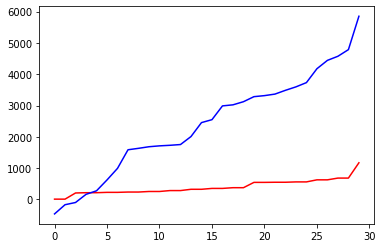

GAN:
[[1259. -321. -222. 3295. 1234. 1579. 2713. 2152. 4181.  951. 1361. -595.
  2153.  389. 3267.  122. 3560. 3978. 2177. 2092. 1203. 3570. 1589. 2249.
  2953. 2029. 3502. 2691. 3773. 6013.]]
1999 1.0 1.0
30
30


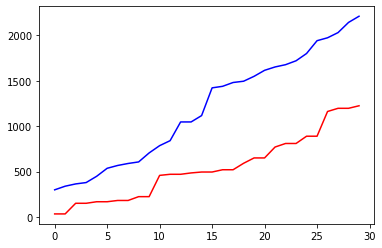

GAN:
[[-135.  611.  259.  644.  731.  874.  499. 1035.  865. 1569.  828. 1697.
  1161. 1035. 1286. 1274. 1499. 1543. 1166. 1451. 1789. 1821. 1246.  931.
  2304. 2155. 1993. 1704. 1929. 2393.]]
2999 1.0 1.0
30
30


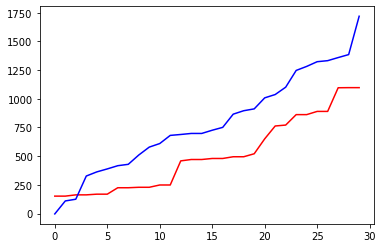

GAN:
[[ 417.  173.  552.  761.  666.  545. 1512.  732.  365. 1029. 1013. 1386.
   999.  894. 1307. 1147.  912. 1509.  751. 2098. 1485. 1989. 1311. 1651.
  1910. 1889. 2132. 1522. 2238. 2160.]]
3999 0.0 1.0
30
30


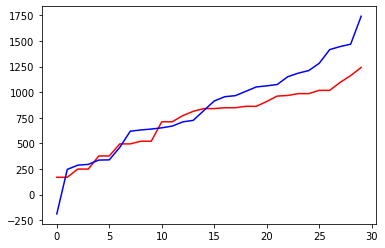

GAN:
[[ 258.  202.  388.   85.  372.  816.  266.  844.  943.  779. 1006.  770.
  1028. 1194.  942.  983.  919. 1134. 1798.  855. 1098.  754. 1276. 1371.
   800.  959.  962. 1547.  986. 1604.]]
4999 1.0 1.0
30
30


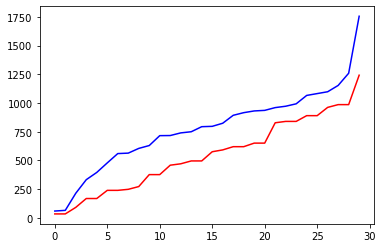

GAN:
[[  39.   19.  395.  481.  255.  455.  341.  576.  588.  555.  874. 1107.
   600.  633.  782.  450.  521.  745.  556. 1240. 1244.  784.  905.  549.
  1081. 1057.  790. 1059. 1460.  899.]]
5999 1.0 1.0
30
30


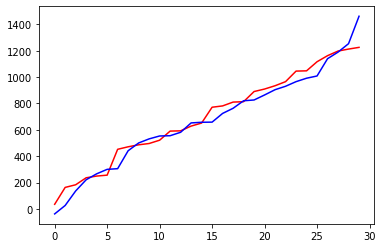

GAN:
[[ 101.  237. -254.  225.   77.  721.  719.  700.  801. 1104. 1021.  664.
  1046. 1428.  911. 1106. 1152.  973. 1160.  302.  955.  713.  466.  878.
   646. 1094. 1256. 1490.  805. 1734.]]
6999 1.0 1.0
30
30


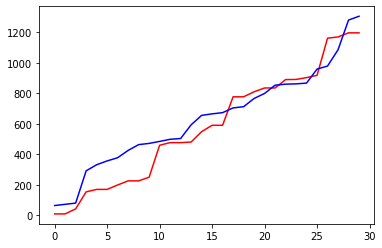

GAN:
[[   2.  465.   83.   -0.  384.  508.   28.  669.  810.  450.  546.  259.
   463.  508.  534.  589.  480.  573. 1037.  341.  434.   -3.  540.  631.
   251.  718.  717.  876.  517.  954.]]
7999 1.0 1.0
30
30


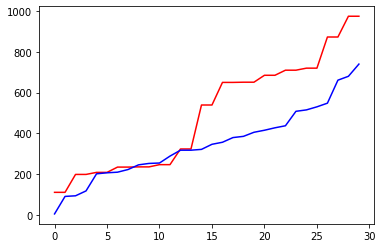

GAN:
[[ 38. 158. -39. 105.  98. 506. 263. 325. 515. 503. 473. 396. 269. 650.
  420. 440. 515. 516. 595. 117. 168. 226.  68. 305. 349. 459. 556. 597.
  278. 824.]]
8999 1.0 1.0
30
30


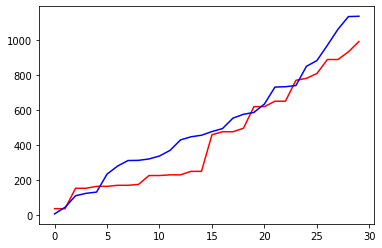

GAN:
[[  30.  351.  -60.   42.  416.  302.  122.  927. 1060.  510.  558.  445.
   618.  657.  748.  764.  827.  438. 1083.  591.  835.  326. 1121.  852.
   465.  988.  919.  851.  804. 1223.]]
9999 1.0 1.0
30
30


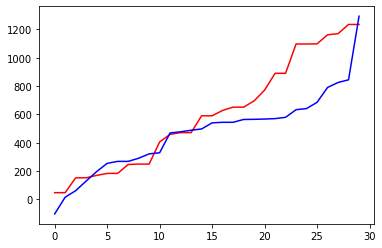

GAN:
[[ 58. 147.  40. 130. 149. 294. 164. 260. 225. 456. 309. 309. 179. 316.
  254. 165.  61.  95. 127.  21. 125.  81.  71. 175. 250. 290. 366. 339.
  273. 450.]]


In [42]:
#need to rerun web scraper and save collected csv as card name rather than vector


latent_dim =30
# create the discriminator


#attempt to group by only Warrior and Neutral
#cards = groupby_class(['Warrior', 'Neutral'], cards)
#print(cards[0]['id'])
#i=0
#for card in cards:
 #   card['id'] = i
  #  i+=1

#try changing activations n such on models
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
created_decks, created_gans = train(generator, discriminator, gan_model, latent_dim)


In [45]:
#print(created_gans)
final_decks = []
for decks in created_decks:
    #print(decks)
    deck = []
    for card in decks[0]:
        if abs(card) <= len(cards):
            deck.append(abs(card))
        else:
            break
    #print(len(deck))
    if(len(deck) == 30):
        final_decks.append(deck)
                      
print(final_decks)

for decks in final_decks:
    print('DECK:')
    #convert float list to int list
    decks = [int(a) for a in decks]
    readable = vector_to_deck(decks)
    for card in readable:
        print(card['name'], ',  ' ,card['playerClass'])


[[90.0, 117.0, 252.0, 4.0, 93.0, 209.0, 254.0, 317.0, 356.0, 317.0, 201.0, 222.0, 379.0, 288.0, 321.0, 427.0, 405.0, 346.0, 740.0, 415.0, 437.0, 245.0, 680.0, 385.0, 206.0, 508.0, 530.0, 515.0, 661.0, 548.0], [43.0, 456.0, 130.0, 5.0, 369.0, 554.0, 233.0, 732.0, 337.0, 477.0, 279.0, 311.0, 320.0, 587.0, 123.0, 734.0, 447.0, 494.0, 884.0, 429.0, 576.0, 312.0, 635.0, 741.0, 109.0, 1138.0, 1063.0, 972.0, 851.0, 1136.0]]
DECK:
Grimscale Oracle ,   Neutral
Mind Vision ,   Priest
Cruel Taskmaster ,   Warrior
Desk Imp ,   Neutral
Hand of Protection ,   Paladin
Worthy Expedition ,   Druid
Crystalsong Portal ,   Druid
Invocation of Frost ,   Shaman
Novice Engineer ,   Neutral
Invocation of Frost ,   Shaman
Voidwalker ,   Warlock
Arcane Servant ,   Neutral
River Crocolisk ,   Neutral
Fishflinger ,   Neutral
Khadgar ,   Mage
Temple Berserker ,   Neutral
Snack Run ,   Paladin
Minefield ,   Warrior
Fire Breather ,   Warlock
Spitting Camel ,   Neutral
Vicious Scraphound ,   Warrior
Commanding Shout 

In [17]:
#instead of rounding maybe try converting it to int, getting rip of the decimal point
#replace old card system to new one with data.json


#d = []
#for cards in created_decks[6]:
 #   if abs(cards) <= maximum and abs(cards) > 0:
  #      d.append(round(abs(cards)))
#f = vector_to_deck(d)
#f